In [3]:
from helpers import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from helpersTimo import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import math 


In [4]:
def mean_median_change_in_rank_of_peoples(df_pagerank_before, df_pagerank_after, gender_dict):
    """
    Returns the mean and median of the change in rank of the nodes that are people or not and graphs the distribution of the change in rank

    Args:
        df_pagerank_before (dataframe): dataframe with the PageRank of each node in the fisrt ranking
        df_pagerank_after (dataframe): dataframe with the PageRank of each node in the second ranking
        gender_dict (dict): Dictionary of the genders of the nodes
    
    Returns:
        mean_people (float): mean of the change in rank of the people
        median_people (float): median of the change in rank of the people
        mean_not_people (float): mean of the change in rank of the not people
        median_not_people (float): median of the change in rank of the not people

    """
    df_diff = compare_rankings2(df_pagerank_before, df_pagerank_after)

    desired_genders = ['Male', 'Female']

    # Use the map function to map nodes to their genders
    df_diff['node_gender'] = df_diff.index.map(gender_dict)

    #Filter rows based on the desired genders
    df_diff_subset_people = df_diff[df_diff['node_gender'].isin(desired_genders)]

    df_diff_subset_not_people = df_diff[~df_diff['node_gender'].isin(desired_genders)]
    

    # plot the diff of the df_diff_subset_people
    fig, axes = plt.subplots(1, 1, figsize=(15, 10))
    axes.hist(df_diff_subset_not_people["Diff"], bins=100, alpha=0.5, label='Not people', color="#B80C09", density=True)
    axes.hist(df_diff_subset_people["Diff"], bins=100, alpha=0.5, label='People', color="#01BAEF", density=True)

    axes.axvline(df_diff_subset_people["Diff"].median(), color='blue', linestyle='dashed', linewidth=1, alpha=0.5, label='Median')
    axes.axvline(df_diff_subset_not_people["Diff"].median(), color='red', linestyle='dashed', linewidth=1, alpha=0.5, label='Median not people')
    axes.legend()
    axes.set_title("Difference of the rank between the two rankings")
    axes.set_xlabel("Difference of the rank")
    axes.set_ylabel("Number of nodes")
    axes.grid(True)
    axes.text(100, 0.00075, 'Better ranked after', bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "rarrow, pad=0.3", 'ec': 'green'})
    axes.text(-100, 0.00075, 'Better ranked before', ha= "right", bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "larrow, pad=0.3", 'ec': 'red'})
    plt.show()

    return df_diff_subset_people["Diff"].mean(), df_diff_subset_people["Diff"].median(), df_diff_subset_not_people["Diff"].mean(), df_diff_subset_not_people["Diff"].median()

In [5]:
dfs = preprocessing()
folder_path = "dataset/wikispeedia_paths-and-graph/"
dfs["article"] = pd.read_csv(folder_path + "articleAndGender.csv", sep=",")
gender_dict = dfs["article"].set_index("article")['gender'].to_dict()

In [6]:
## Use Examples ##
print(dfs["article"].loc[dfs["article"]["article"] == "United_States"].values[0][1]) 
print(gender_dict["United_States"])

Unknown
Unknown


In [7]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")

In [8]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")
graph_male, name_targets_M = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Male")
df_pagerank_female = get_df_pagerank(graph_female)
df_pagerank_male = get_df_pagerank(graph_male)

In [9]:
## J'ai plus de nodes qu'avant !!!????
graph_female.number_of_nodes()

1175

In [10]:
## J'ai plus de nodes qu'avant !!!????
graph_male.number_of_nodes()

3400

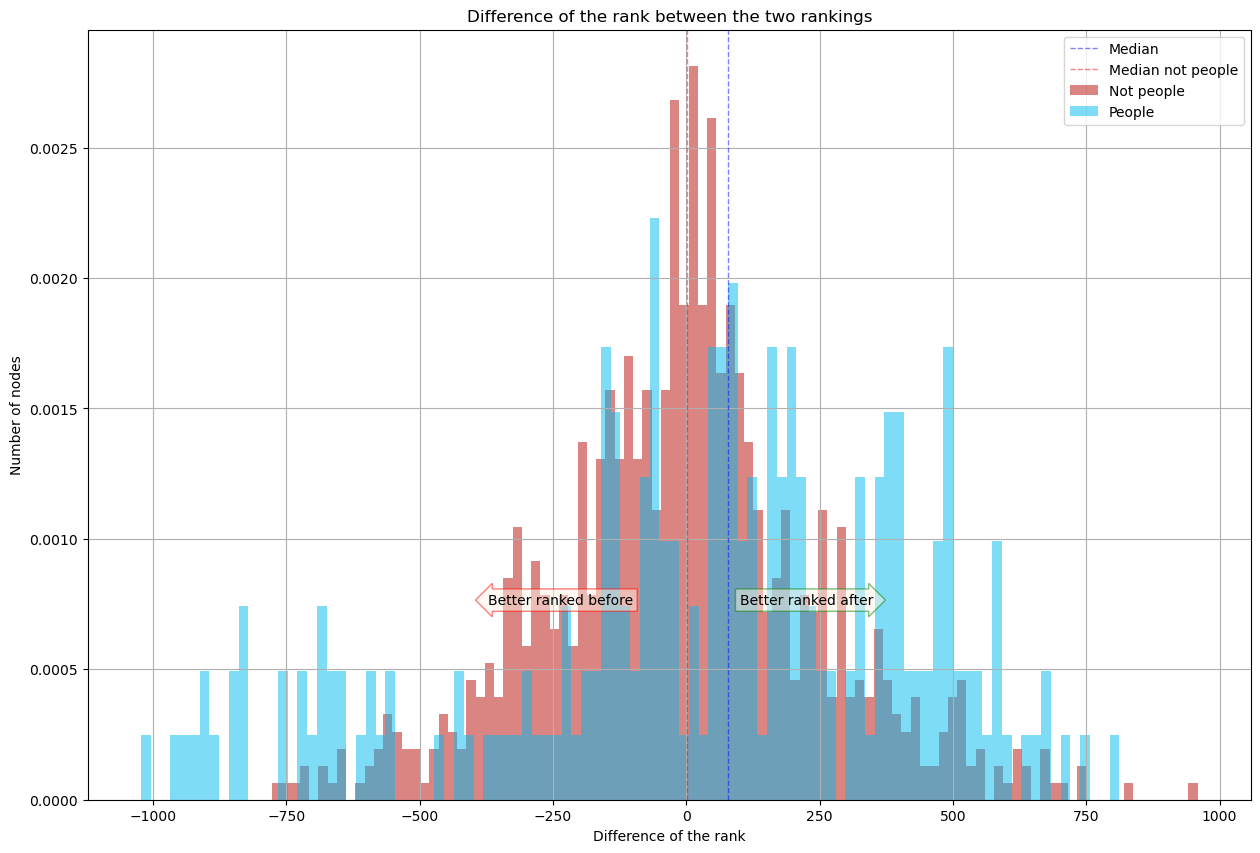

(24.96818181818182, 77.5, -6.234960272417707, 1.0)

In [11]:
mean_median_change_in_rank_of_peoples(df_pagerank_female, df_pagerank_male, gender_dict)

In [12]:
links_network = create_graph_links(dfs["links"])
df_pagerank_links = get_df_pagerank(links_network)

In [13]:
network_both_gender, endnode_names_both_gender = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"] , gender_dict, "Male", last_node_from_path= False, both_gender=True) 
print(network_both_gender.number_of_nodes())
df_pagerank_both_gend = get_df_pagerank(network_both_gender)

3474


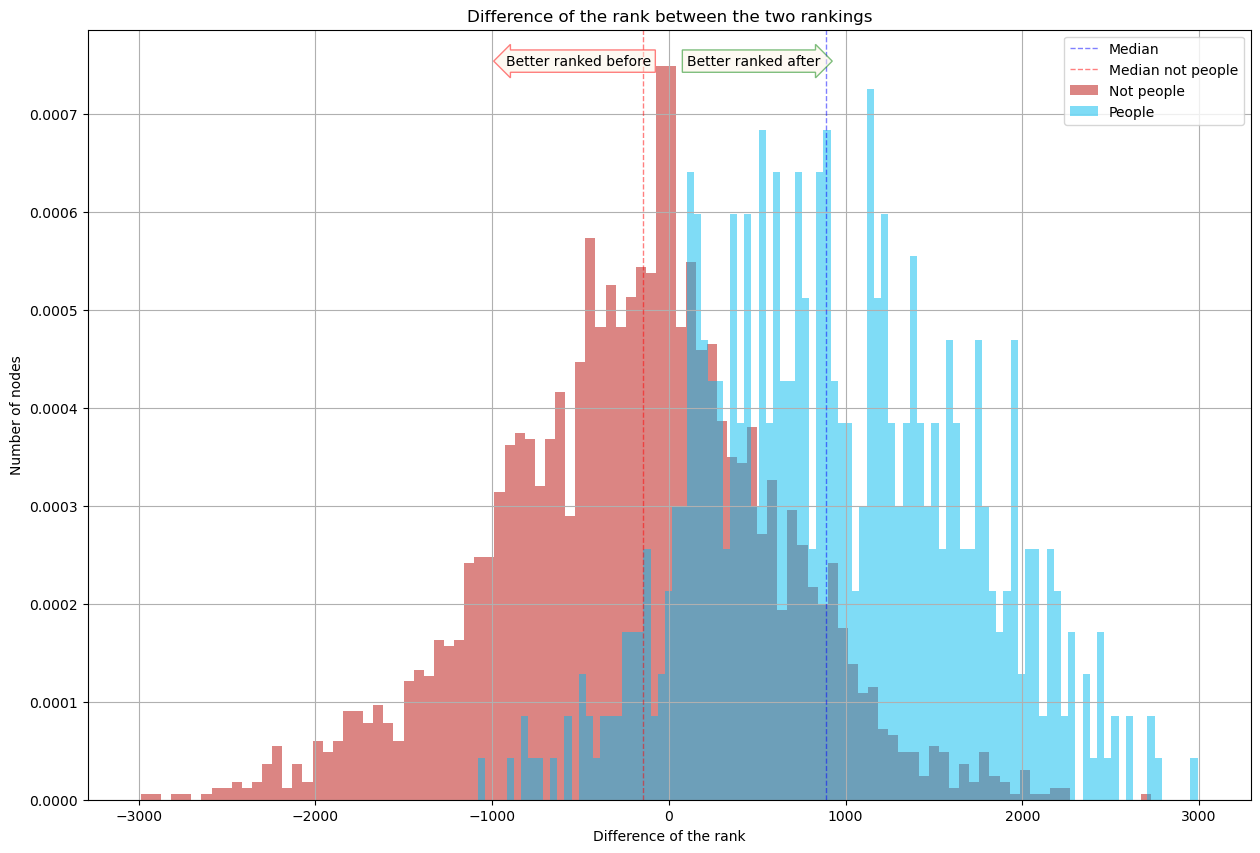

(939.9391304347826, 887.0, -186.49585921325053, -146.5)

In [14]:
mean_median_change_in_rank_of_peoples(df_pagerank_links, df_pagerank_both_gend, gender_dict)

In [15]:
import csv
from urllib.parse import unquote
from helpers import *

# Function to create the dictionary from a TSV file
def create_dictionary_from_tsv(file_path):
    data_dict = {}

    with open(file_path, 'r', newline='', encoding='utf-8') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        
        all_articles = []
        for row in reader:
            if len(row) == 2:
                article, subjects = row
                subjects_list = subjects.split('.')
                article = unquote(article)
                all_articles.append(article)

                data_dict[article] = {
                    'main_subject': unquote(subjects_list[1]) if len(subjects_list) >= 2 else None,
                    'secondary_subject': unquote(subjects_list[2]) if len(subjects_list) >= 3 else None,
                    'tertiary_subject': unquote(subjects_list[3]) if len(subjects_list) >= 4 else None
                }
    
    return data_dict, all_articles

# Example usage
result_dict, all_articles = create_dictionary_from_tsv("dataset/wikispeedia_paths-and-graph/categories.tsv")


In [16]:
rank_both_gender = sort_and_rank(df_pagerank_both_gend)

In [17]:
def get_cat(Node):
    try:
        return result_dict[Node]["main_subject"]
    except KeyError as e:
        return np.nan

rank_both_gender["MainCat"] = rank_both_gender.apply(lambda row: get_cat(row["Node"]), axis=1)   
all_cat = rank_both_gender["MainCat"].value_counts().index.to_list()

In [18]:
def graph_category_rank(df_rank):
    fig, axes = plt.subplots(5, 3, figsize=(20, 25))
    colors = plt.cm.tab20(range(20))

    for i in range(5):
        for j in range(3):
            category = all_cat[3*i+j]
            df_subset_cat = df_rank.loc[df_rank["MainCat"] == category, :]
            axes[i, j].hist(df_subset_cat["Rank"], bins=100, alpha=0.5, label=category, color=colors[3*i+j], density=True)
            axes[i, j].set_title(category)
            axes[i, j].axvline(df_subset_cat["Rank"].median(), color="Black", linestyle='dashed', linewidth=1, alpha=0.75, label='Median')
            axes[i, j].set_xlabel("Rank")
            axes[i, j].set_ylabel("Number of nodes normalized")

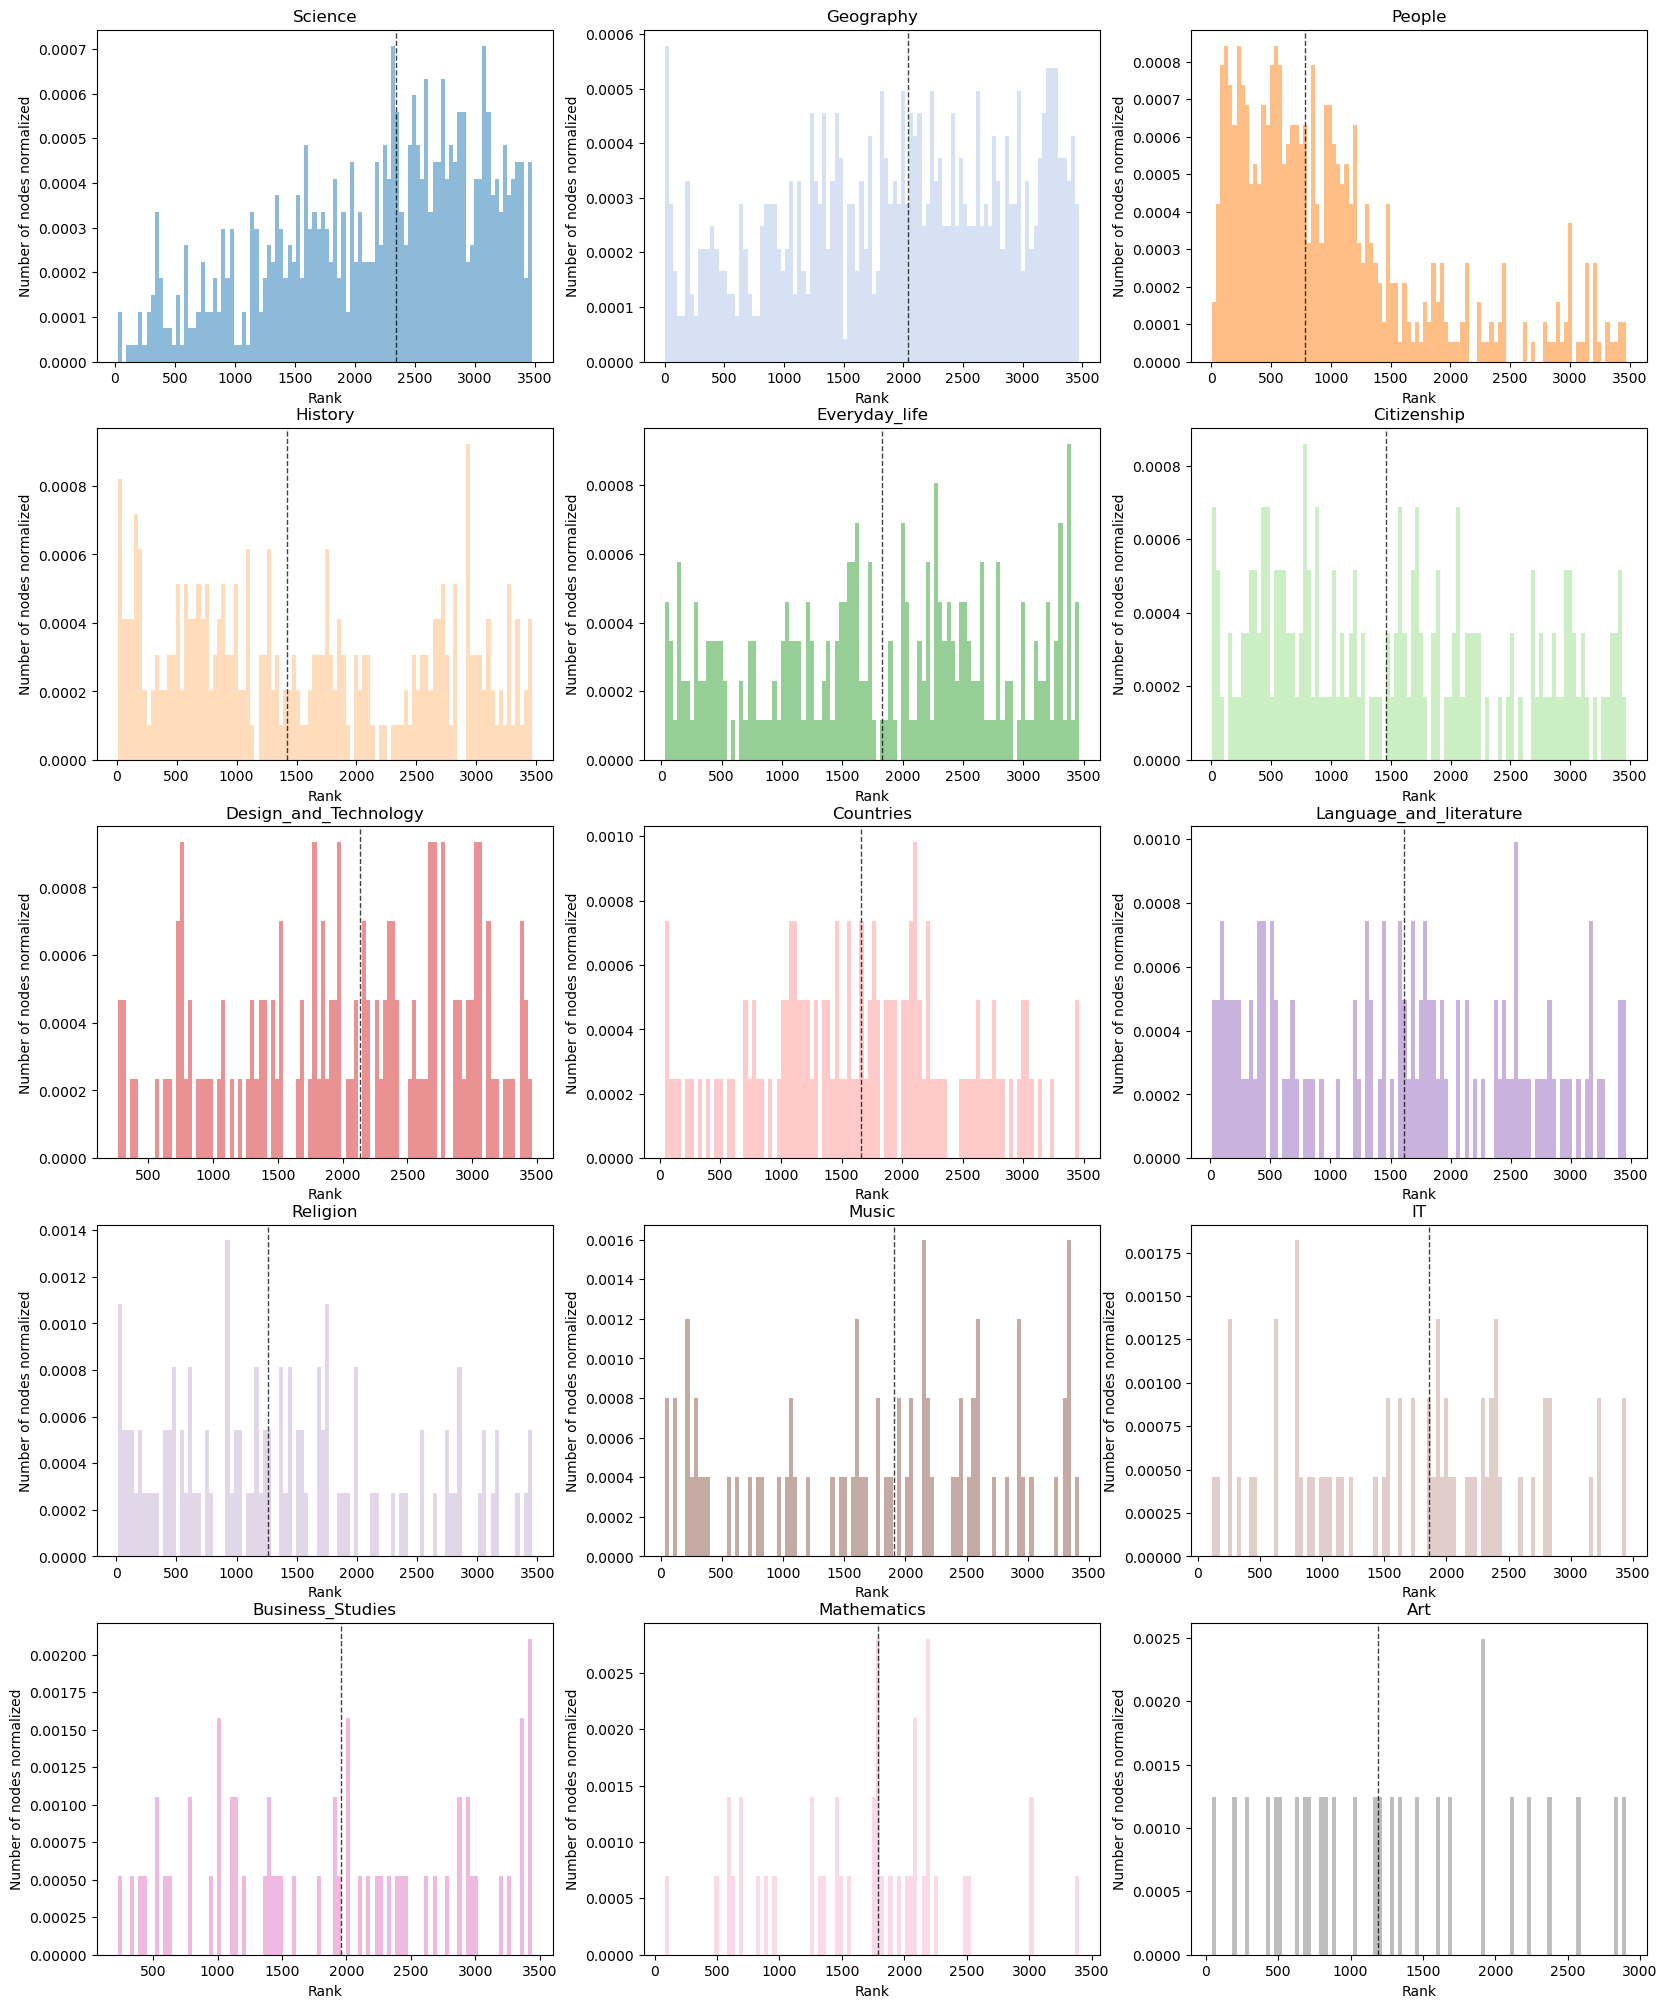

In [19]:
graph_category_rank(df_pagerank_both_gend)

In [20]:
df_rank_links = sort_and_rank(df_pagerank_links)
df_rank_links["MainCat"] = df_rank_links.apply(lambda row: get_cat(row["Node"]), axis=1)   
all_cat = df_rank_links["MainCat"].value_counts().index.to_list()

len(all_cat)

15

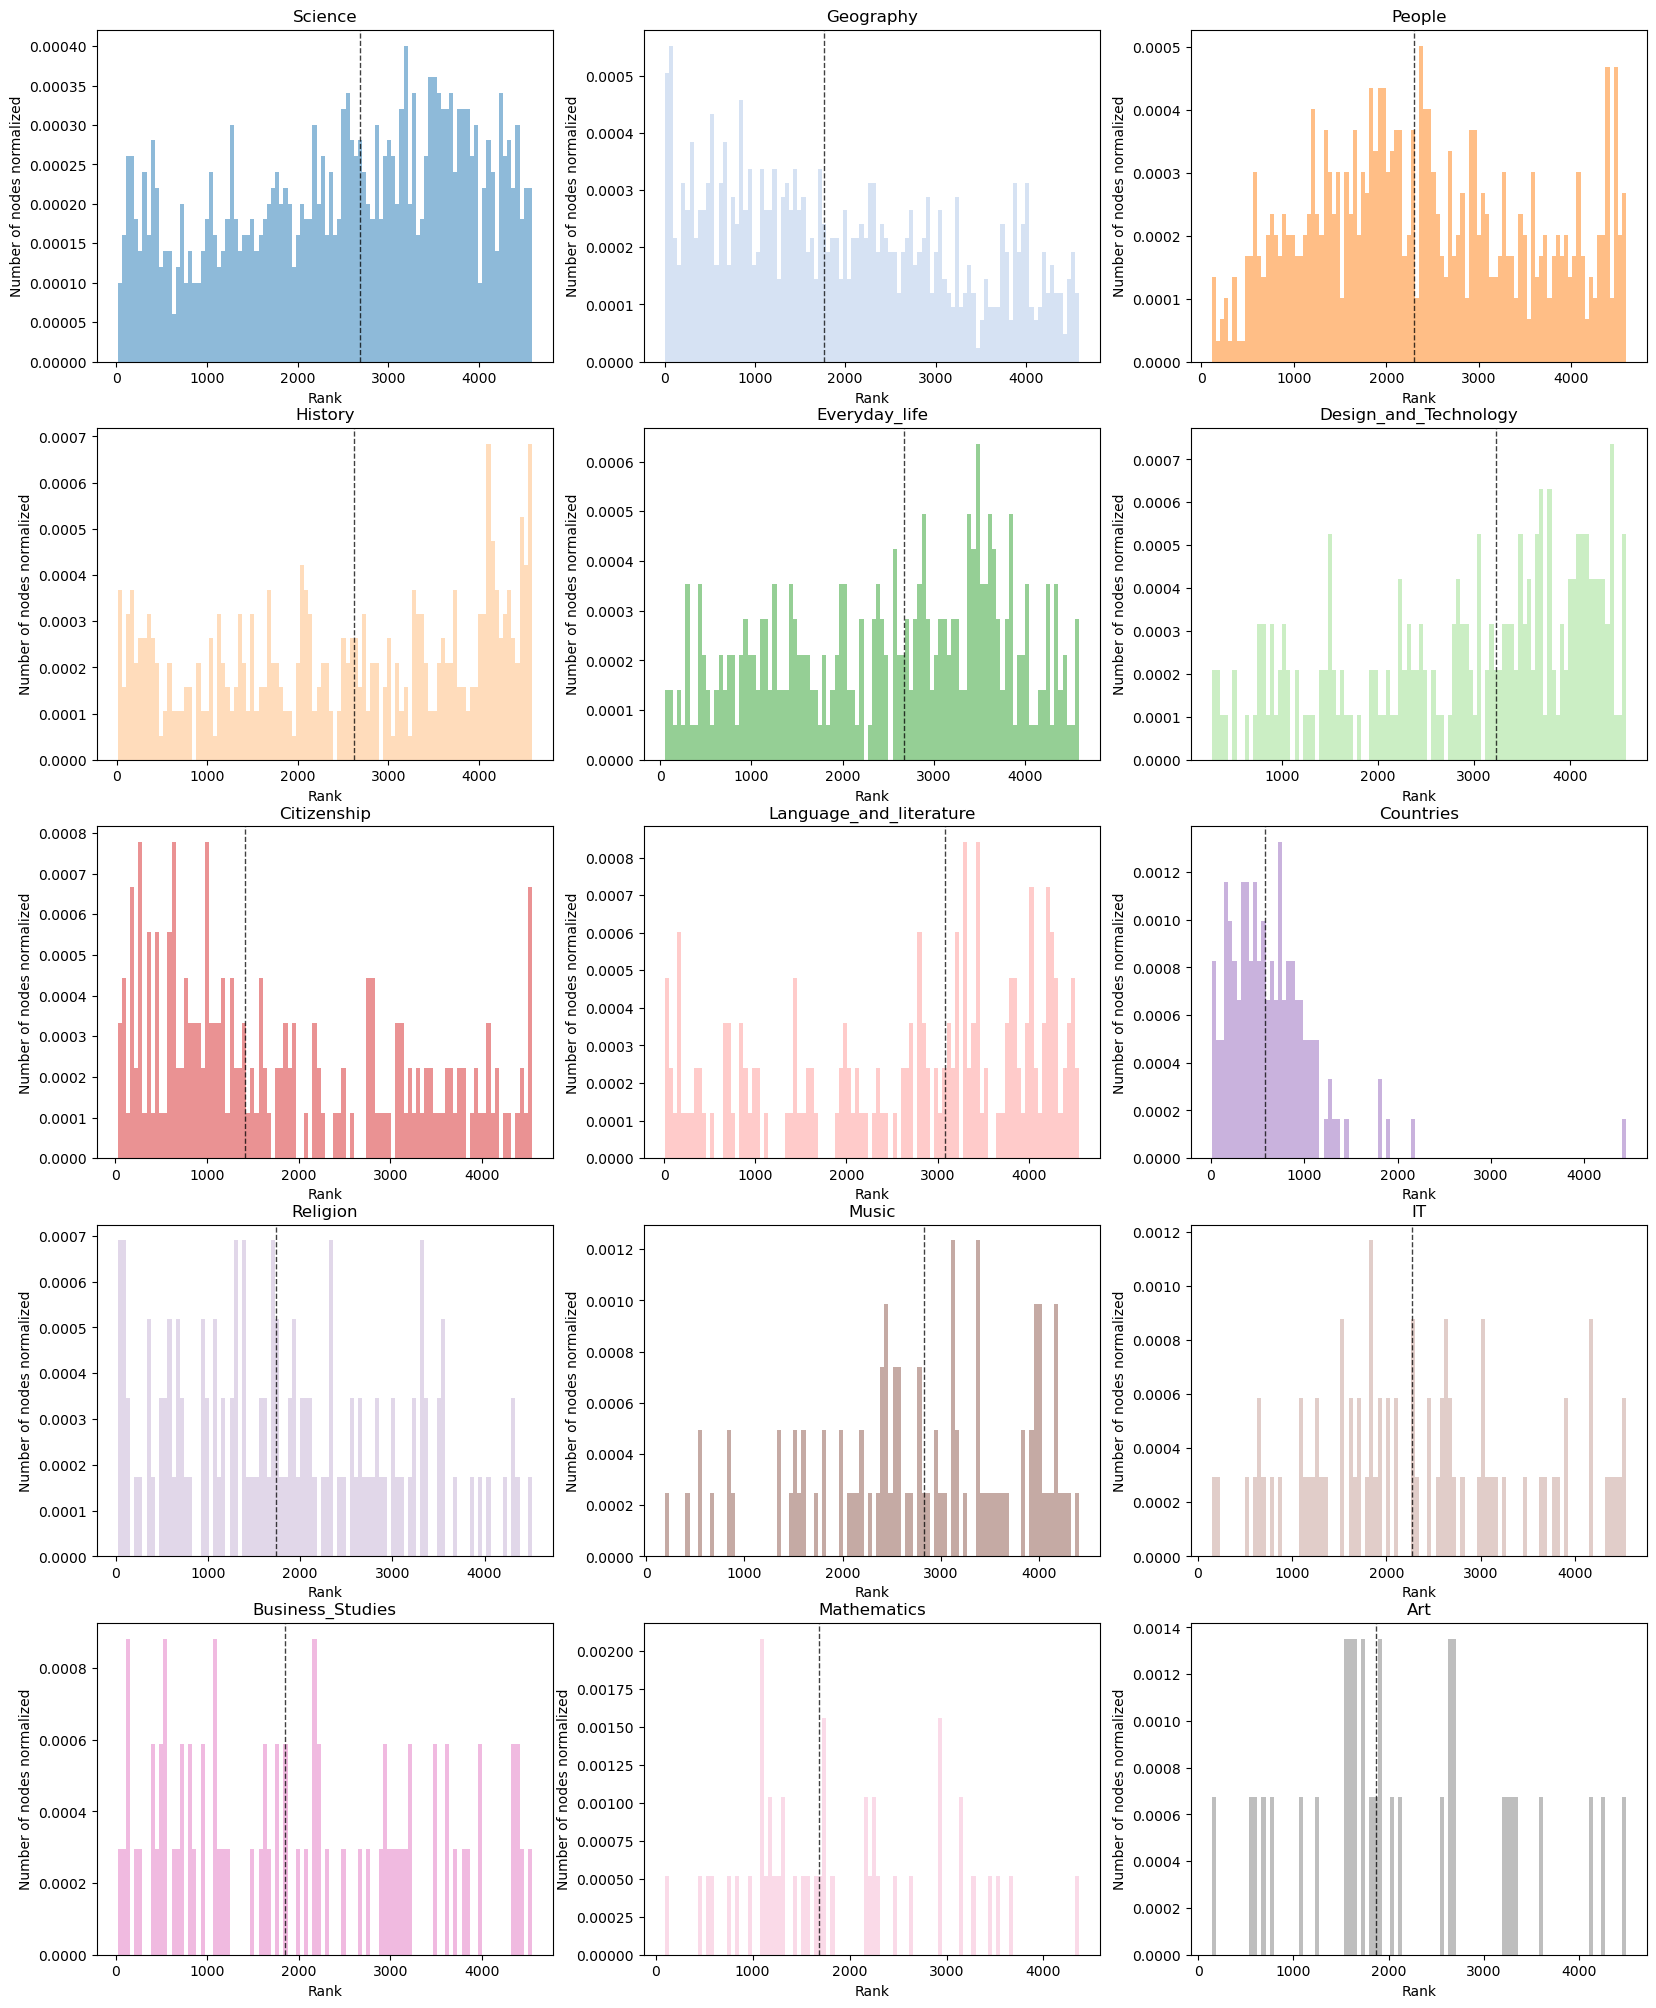

In [21]:
graph_category_rank(df_rank_links)

In [22]:
all_path_graph = create_graph_path(dfs)
df_pagerank_all_path = get_df_pagerank(all_path_graph)
df_rank_all_path = sort_and_rank(df_pagerank_all_path)
df_rank_all_path["MainCat"] = df_rank_all_path.apply(lambda row: get_cat(row["Node"]), axis=1)
all_cat = df_rank_all_path["MainCat"].value_counts().index.to_list()
print(len(all_cat))

15


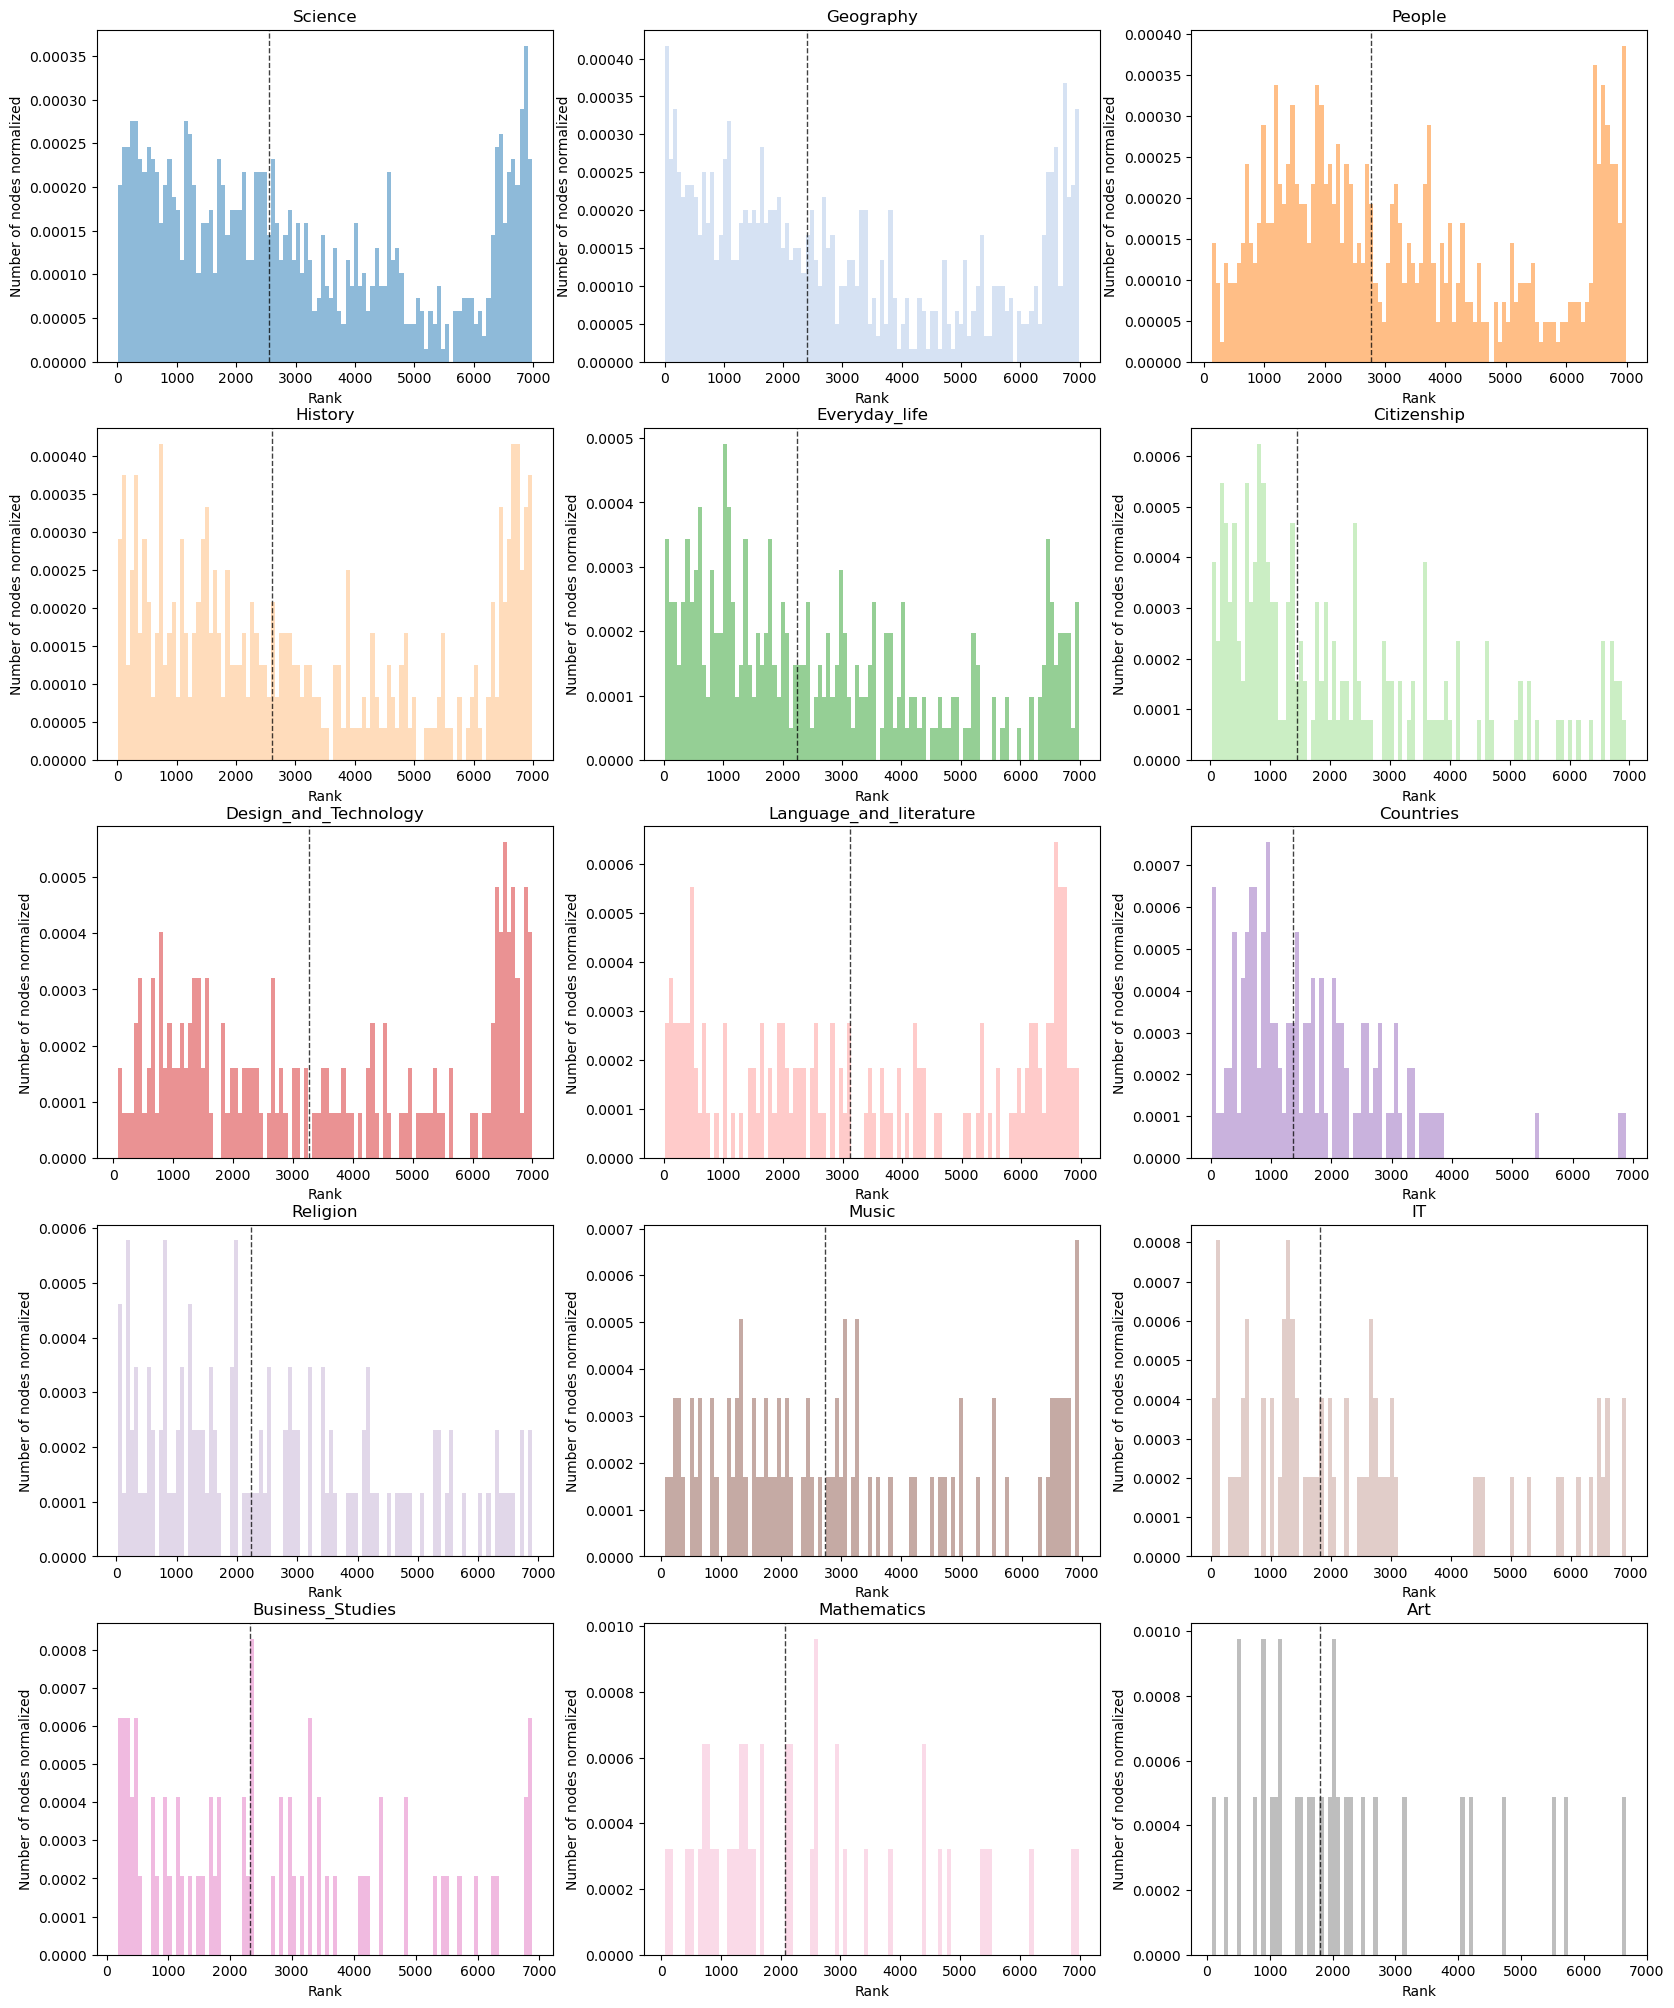

In [23]:
graph_category_rank(df_rank_all_path)

In [24]:
def get_median_rank_per_cat(df, all_cat):
    data = {}
    for cat in all_cat:
        data[cat] = df.loc[df["MainCat"] == cat, "Rank"].median()

    df_out = pd.DataFrame(list(data.items()), columns=['MainCat', 'MedianRank']).set_index("MainCat")
    
    return df_out
    

In [25]:
median_all_path = get_median_rank_per_cat(df_rank_all_path, all_cat)

In [26]:
median_all_links = get_median_rank_per_cat(df_rank_links, all_cat)

In [27]:
median_both_gen = get_median_rank_per_cat(rank_both_gender, all_cat)

In [28]:
all_median = pd.concat([median_all_path, median_all_links, median_both_gen], axis=1)

In [29]:
all_median.columns = ["AllPath", "AllLinks", "BothGender"]
all_median.head(15)

,AllPath,AllLinks,BothGender
MainCat,,,
Science,2548.0,2692.0,2342.0
Geography,2409.0,1760.0,2037.0
People,2765.0,2296.0,785.5
History,2607.0,2617.0,1423.5
Everyday_life,2246.5,2673.0,1830.0
Citizenship,1439.0,1415.0,1463.0
Design_and_Technology,3275.0,3231.5,2134.0
Language_and_literature,3121.0,3084.0,1608.0
Countries,1365.0,580.5,1663.0


In [30]:
# Faire une graph avec les catégories, plus la node est grosse plus il y a de nodes dans cette catégorie et plus le lien entre deux catégorie est fort plus il y a de lien entre les deux catégories
# NetworkX avec les people au centre et leur paths qui les rejoint, couleur par catégorie 


In [37]:
def create_grap_cats(dfs, categories_dict):
    """
    Create a graph with the categories as nodes and the links between them as edges

    Args:
        dfs (dict): Dictionary of the dataframes
        categories_dict (dict): Dictionary of the categories of the nodes
    """

    G = nx.DiGraph()

    path_finished_dfs = dfs["paths_finished"]
    path_unfinished_dfs = dfs["paths_unfinished"]

    for index, row in path_finished_dfs.iterrows():

        path = row['path'].split(';')
        
        # Gets the category of the first node in the path that has a category  
        start = 0  
        for i in range(len(path)- 1):
            try:
                category_from = categories_dict[path[i]]['main_subject']
                start = i  
                G.add_node(category_from, weight=1)
                break
            except KeyError as e:
                print("KeyError for ", e, " in ", path[i], "index is ", i)
                continue

        # We go from start + 1 to not get twice the same node and we go to len(path) - 2 to not get the last node
        for i in range(start + 1, len(path)- 2):
            
            # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
            if path[i+1][0] == '.': 
                continue
            
            # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
            if path[i][0] == ".":
                path[i] = path[i][1:]


            try: 
                category_to = categories_dict[path[i]]['main_subject']

            except KeyError as e:
                print("Cat_to KeyError for ", e, " in ", path[i], "index is ", i)
                continue
            

            if G.has_node(category_to):
                 G.nodes[category_to]['weight'] += 1
            else:
                G.add_node(category_to, weight=1)
            

            if G.has_edge(category_from, category_to):
                G[category_from][category_to]['weight'] += 1
            else:
                G.add_edge(category_from, category_to, weight=1)

            
        
            category_from = category_to
            

    # for index, row in path_unfinished_dfs.iterrows():

    #     path = row['path'].split(';')

    #     try: 
    #         gender_last = gender_dict[row["target"]]
    #     except KeyError as e:
    #         #print("KeyError for ", e)
    #         continue

    #     if isinstance(gender_last, float) and math.isnan(gender_last):
    #         continue
        
    #     if gender_last == target_gender or (both_gender and (gender_last == "Male" or gender_last == "Female")):
            
    #         for i in range(len(path) -1 -indexing_correction):

    #             # The "."" at the beggining is a marker of going back to this page, we don't want to add the backlink
    #             if path[i+1][0] == '.': 
    #                 continue
                
    #             # Remove the "." at the beggining of the node name, this is ok since itterows gives a copy of the dataframe
    #             if path[i][0] == ".":
    #                 path[i] = path[i][1:]

    #             if G.has_edge(path[i], path[i+1]):
    #                 G[path[i]][path[i+1]]['weight'] += 1
    #             else:
    #                 G.add_edge(path[i], path[i+1], weight=1)

    return G


In [38]:
grap_test = create_grap_cats(dfs, result_dict)

KeyError for  'Pikachu'  in  Pikachu index is  0
Cat_to KeyError for  'Pikachu'  in  Pikachu index is  2
KeyError for  'Pikachu'  in  Pikachu index is  0
Cat_to KeyError for  'Pikachu'  in  Pikachu index is  2
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
Cat_to KeyError for  'Pikachu'  in  Pikachu index is  2
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0
KeyError for  'Pikachu'  in  Pikachu index is  0

In [39]:
for node in grap_test.nodes():
    if 'weight' in grap_test.nodes[node]:
        print(f"Node {node}: {grap_test.nodes[node]['weight']}")
    else:
        print(f"Node {node} does not have a 'weight' attribute")

Node History: 20
Node Geography: 2
Node Countries: 90
Node Citizenship: 2
Node Religion: 22
Node Science: 1
Node People: 1
Node Everyday_life: 6
Node Art: 1
Node Language_and_literature: 9
Node Music: 8
Node Business_Studies: 12
Node Design_and_Technology: 2
Node IT: 21
Node Mathematics: 8


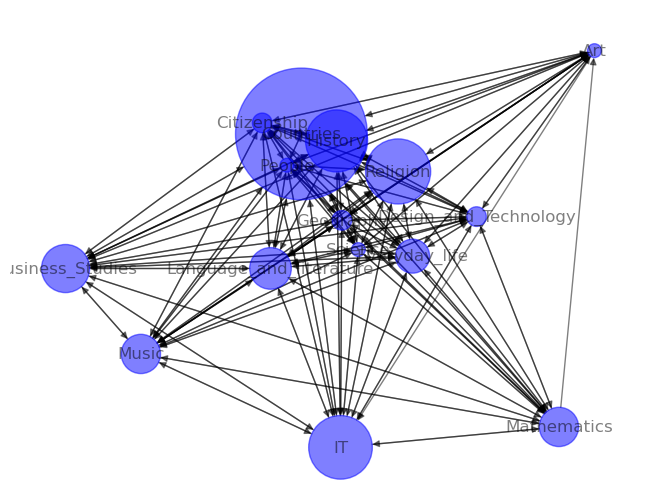

In [44]:
pos = nx.spring_layout(grap_test, k=0.15, iterations=20)
weights = nx.get_node_attributes(grap_test, 'weight')
grap_test.remove_edges_from(nx.selfloop_edges(grap_test))

nx.draw(grap_test, pos, alpha=0.5, node_color="blue", with_labels=True, node_size=[v * 100 for v in weights.values()])